In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import math

from matplotlib import colors
from IPython.display import set_matplotlib_formats


np.set_printoptions(precision=8)

%matplotlib inline

In [2]:
N = 10
N2 = N * N

NOISE = 10
T = 100
THRESHOLD = 10

E = 0.00015
KF = 0.2
KR = 0.9
ALPHA = 10

In [3]:
def create_patterns():
    zero = np.array([
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
    ])

    one = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
    ])

    two = np.array([
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
    ])

    three = np.array([
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
    ])

    four = np.array([
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
    ])

    five = np.array([
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
    ])

    six = np.array([
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
    ])

    seven = np.array([
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
    ])


    eight = np.array([
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
    ])

    nine = np.array([
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
    ])

    patterns = [
        zero.flatten(),
        one.flatten(),
        two.flatten(),
        three.flatten(),
        four.flatten(),
        five.flatten(),
        six.flatten(),
        seven.flatten(),
        eight.flatten(),
        nine.flatten()
    ]

    return patterns

def create_W():
    W = np.zeros((N2, N2))
    for i in range(N2):
        for j in range(N2):
            if i == j:
                W[i, j] = 0
                continue
            for p in patterns:
                W[i, j] += (p[i] * p[j])
            W[i, j] /= len(patterns)
    return W

In [4]:
def plot(x, n=N, cmap='binary', cbar=True):
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(x.reshape((n, n)), cmap=cmap, vmin=0, vmax=1)
    
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
    
    if cbar:
        fig.colorbar(im, ax=ax)
    
    return fig, ax

In [5]:
def add_noise(x):
    y = np.copy(x)
    
    for i in range(NOISE):
        n = np.random.randint(N2)

        if y[n] == 0:
            y[n] = 1
            continue
        y[n] = 0

    return y

In [6]:
def draw():
    def redraw(u, cmap=None, refresh=True):
        if cmap is None:
            plot(u)
        else:
            plot(u, cmap=cmap)
    
        if refresh:
            display.clear_output(wait=True)
            plt.pause(0.5)
        
    return redraw

In [7]:
def distance(p, u):
    s = 0
    for i in range(N2):
        s += abs(u[i] - p[i])
    return s

In [8]:
def f(x):
    return 1 / (1 + np.exp(-x/E))

In [9]:
patterns = create_patterns()
W = create_W()
noise_patterns = list(map(add_noise, patterns))

In [10]:
def madnn(y, should_plot, refresh):
    CMAP = colors.LinearSegmentedColormap.from_list("", ["white","purple"])

    redraw = draw()
    
    a = np.copy(y)
    
    n = np.zeros(N2)
    e = np.zeros(N2)
    u = np.random.uniform(0, 1, N2)
    
    count = []
    period = []
    distances = []
    
    for i in range(len(patterns)):
        count.append([])
        period.append([])
        distances.append([])

    for t in range(T):
        uu = np.copy(u)

        for i in range(N2):
            wu = 0
            for j in range(N2):
                wu += (W[i, j] * uu[j])
            
            n[i] = KF * n[-1] + wu
            e[i] = KR * e[-1] - ALPHA * u[i] + a[i]
            u[i] = f(n[i] + e[i])

        c = False
        for i, p in enumerate(patterns):
            d = distance(p, u)
            if d <= THRESHOLD:
                count[i].append(t)
                distances[i].append(d)
                c = True

        if should_plot:
            if c:
                redraw(u, cmap=CMAP, refresh=refresh)

            else:
                redraw(u, cmap='Greys', refresh=refresh)
    
    for i, p in enumerate(count):
        for j in range(1, len(p)):
            period[i].append(count[i][j] - count[i][j-1])
            
    return count, period, distances

In [11]:
count, period, distances = madnn(noise_patterns[1], should_plot=True, refresh=True)

<ipython-input-8-e45ae1dd333e>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x/E))


In [12]:
period

[[], [7, 15, 7, 7, 8, 7, 7, 8, 7, 7, 8], [], [], [], [], [], [], [], []]

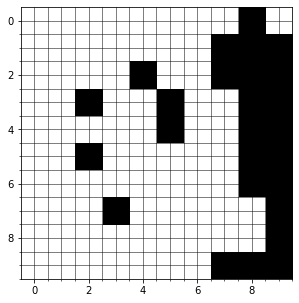

In [13]:
f, a = plot(noise_patterns[1].flatten(), cbar=False)

In [14]:
f.savefig('plot.png')

In [35]:
from PIL import Image

yy = np.copy(noise_patterns[1])

for i in range(N2):
    if yy[i] == 0:
        yy[i] = 255
        

xx = yy.reshape((N, N)).astype(np.uint8)

im = Image.fromarray(xx)
im.save('test.png')

In [34]:
xx

array([[  0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0,   0, 255,   0,   0, 255, 255, 255],
       [  0,   0, 255,   0,   0, 255,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0, 255,   0,   0, 255, 255],
       [  0,   0, 255,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0, 255,   0,   0,   0,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255]], dtype=uint8)